# COTW 8

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
def round_quarter(num):
    remainder = num % 1
    num = float(int(num))
    
    if remainder == 0:
        return num
    elif remainder <= 0.25:
        return num + 0.25
    elif remainder <= 0.5:
        return num + 0.5
    elif remainder <= 0.75:
        return num + 0.75
    elif remainder > 0.75:
        return num + 1
        
def round_half(num):
    return int(num)+0.5 if num%1 >= 0.5 else int(num)

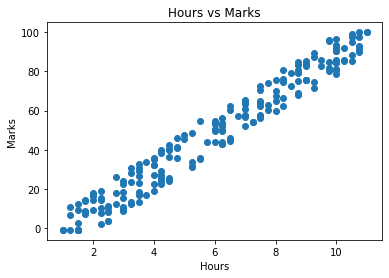

In [4]:
np.random.seed(42)
# array = np.random.randint(1, 10, 50)
# array = np.abs(np.random.standard_normal(50))
num_students = 200
array = np.random.rand(num_students)
hours = (array * 100).astype('int') / 10 + 1
hours = np.array(list(map(round_quarter, hours)))

marks = array * 100 + np.random.randint(-10, 10, num_students)
marks[marks > 100] -= marks[marks > 100] - 100
marks[marks < 0] -= marks[marks < 0] + 1 
marks = np.array(list(map(round_half, marks)))

plt.scatter(hours, marks)
plt.title('Hours vs Marks')
plt.xlabel('Hours')
plt.ylabel('Marks');

In [5]:
import random


def are_limits_valid(*limits) -> bool:
    for limit in limits:
        if not (limit is int or limit is float):
            return False
    
    return True


def validate_limits(limits:tuple) -> bool:
    if len(limits) != 2:
        raise ValueError('The limits are not the reuired shape')
    if are_limits_valid(*limits):
        raise ValueError('Invalid limit types')


def get_unique_random_numbers(n:int, limits:tuple) -> list:
    numbers = set()
    validate_limits(limits)
    if limits[1] - limits[0] < n:
        raise ValueError('invalid set of limits, this will cause this function to run infinately!')

    while len(numbers) < abs(n):
        numbers.add(random.randrange(*limits))

    return list(numbers)


def add_noise(data:np.ndarray, ambiguous_values:list or tuple = (0, -100, -1), noise:float=0.3) -> np.ndarray:
    data = data.copy().astype('float')
    size = len(data)
    noise = int(size * noise)
    indices_to_add_noise = get_unique_random_numbers(noise, (0, size))

    iter_no = 0
    for index in indices_to_add_noise:
        iter_no+=1
        if iter_no % 4 == 0:  # 20% of the noise is NaN values
            data[index] = (np.nan)
            continue

        data[index] = random.randrange(*ambiguous_values)
        
    return data

In [6]:
data = pd.DataFrame({"hours": hours, "marks": marks})

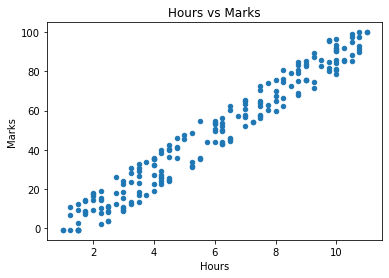

In [7]:
data.plot.scatter("hours", 'marks')
plt.title('Hours vs Marks')
plt.xlabel('Hours')
plt.ylabel('Marks');

In [26]:
data.to_csv('data.csv', index=False)

In [8]:
df = pd.read_csv('./data.csv')
df.head()

,hours,marks
0,4.75,46.0
1,10.50,95.0
2,8.50,79.0
3,7.00,56.5
4,2.50,8.5


In [9]:
# df = data.copy()
np.random.seed(89)
df['hours'] = add_noise(df['hours'], ambiguous_values=(-1, -5, -1), noise=0.1)
df['hours'] = add_noise(df['hours'], ambiguous_values=(12, 24, 1), noise=0.1)
df['marks'] = add_noise(df['marks'], ambiguous_values=(-1, -50, -1), noise=0.1)
df['marks'] = add_noise(df['marks'], ambiguous_values=(100, 150, 1), noise=0.1)

In [10]:
df.head()

,hours,marks
0,4.75,46.0
1,10.50,95.0
2,8.50,79.0
3,16.00,-13.0
4,23.00,8.5


In [11]:
df.isna().sum()

hours    10
marks     9
dtype: int64

In [12]:
(df['hours'] < 0).sum(), (df['marks'] < 0).sum()

(15, 20)

In [13]:
(df['hours'] > 10).sum(), (df['marks'] > 100).sum()

(27, 14)

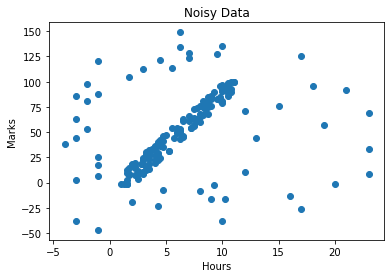

In [14]:
plt.scatter(df['hours'], df['marks'])
plt.title('Noisy Data')
plt.xlabel('Hours')
plt.ylabel('Marks');

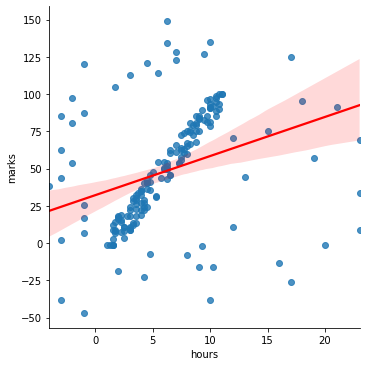

In [15]:
sns.lmplot(x='hours', y='marks', data=df, line_kws={'color': 'red'});

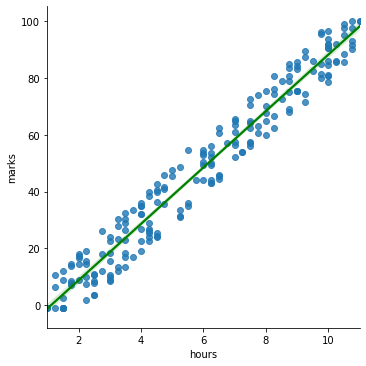

In [16]:
sns.lmplot(x='hours', y='marks', data=data, line_kws={'color': 'green'});

In [17]:
df.describe()

,hours,marks
count,190.000000,191.000000
mean,6.226316,49.439791
std,5.008138,40.187197
min,-4.000000,-47.000000
25%,3.000000,17.750000
50%,5.625000,49.500000
75%,9.000000,80.500000
max,23.000000,149.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   190 non-null    float64
 1   marks   191 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [19]:
df.hours.mean(), df.hours.median(), df.hours.mode()[0]

(6.226315789473684, 5.625, 10.0)

In [20]:
df.marks.mean(), df.marks.median(), df.marks.mode()[0]

(49.43979057591623, 49.5, -1.0)

In [21]:
def plot_df(df=df):
    sns.lmplot(x='hours', y='marks', data=df, line_kws={'color': 'red'})
    plt.title('Hours vs Marks')
    plt.xlabel('Hours')
    plt.ylabel('Marks');

# plot_df()

# Dealing with the ambigious values

In [22]:
df2 = df.copy()

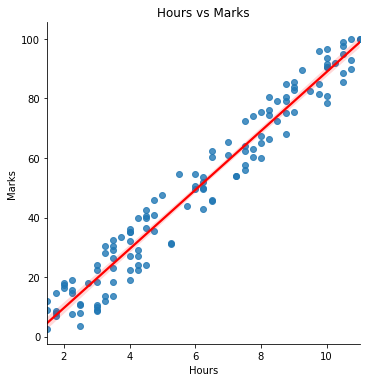

In [24]:
df2.dropna(inplace=True)
plot_df(df2[~((df2.hours < 0 )|(df2.hours > 11)|(df2.marks < 0)|(df2.marks > 100))]) 

In [25]:
df3 = df.copy()

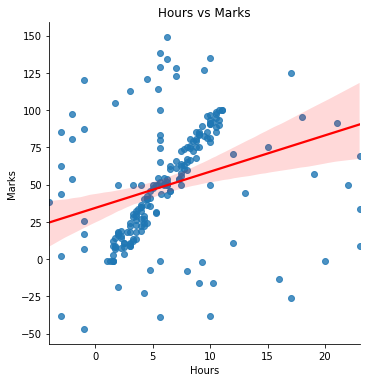

In [26]:
df3.hours.fillna(df3.hours.median(), inplace=True)
df3.marks.fillna(df3.marks.median(), inplace=True)
plot_df(df3)

In [27]:
df3.describe()

,hours,marks
count,200.000000,200.00000
mean,6.196250,49.44250
std,4.882452,39.26793
min,-4.000000,-47.00000
25%,3.187500,18.37500
50%,5.625000,49.50000
75%,8.750000,80.12500
max,23.000000,149.00000


In [28]:
df3.marks[df3.marks < 0] = np.percentile(df3.marks, 50)

In [29]:
df3.marks[df3.marks > 100] = 48.5

In [30]:
df3.hours[df3.hours < 0] = 1

In [31]:
np.percentile(df3.hours, 50)

5.625

In [32]:
df3.hours[df3.hours > 11] = 6.0

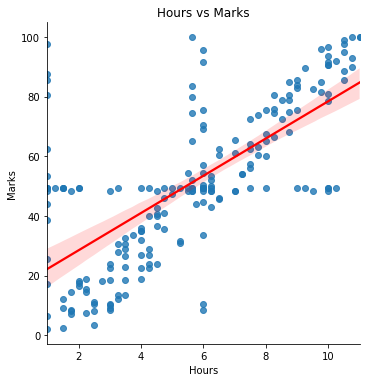

In [33]:
plot_df(df3)

In [34]:
# df.groupby('hours').mean()

In [35]:
df4 = df.copy()

In [38]:
len(df4['hours'][df['hours'] == 23])

3

In [39]:
df4[df4.hours.isna()]

,hours,marks
8,NaN,52.0
29,NaN,138.0
42,NaN,-1.0
62,NaN,74.5
95,NaN,100.0
96,NaN,-39.0
114,NaN,65.0
127,NaN,80.0
179,NaN,129.0
199,NaN,83.5


# group by central tendency approach

In [41]:
round_quarter(df4[(42 <= df4.marks) & (43 >= df4.marks)].hours.mean())

5.5

In [81]:
def average(value, df, col='hours', n=3):
    hmm = df[df[col] == value]
    if len(hmm) >= n:
        return hmm
    
    length = 1
    min = int(value)
    max = min + 1
    while length < n:
        hmm = df[(min <= df[col]) & (max >= df[col])]
        if len(hmm) >= n:
            return hmm
        else:
            min -= 1
            max += 1

In [70]:
for i, item in enumerate(df4[df4['hours'].isna()]['marks']):
    print(i, item)


0 52.0
1 138.0
2 -1.0
3 74.5
4 100.0
5 -39.0
6 65.0
7 80.0
8 129.0
9 83.5


In [ ]:
average(m)

In [99]:
df4['hours'].fillna(df4[df4['hours'].isna()].apply(lambda x: round_quarter(average(x.marks, df4, 'marks', 3)['hours'].mean()), axis=1), inplace = True)

In [100]:
df4.isna().sum()

hours    0
marks    9
dtype: int64

In [102]:
df4[df4['marks'].isna()].apply(lambda x: round_quarter(average(x.hours, df4, 'hours', 3)['marks'].mean()), axis=1)

18     84.25
36     29.50
108    21.00
118    80.00
125    31.25
161    63.00
177    49.75
190     8.25
195    37.00
dtype: float64

In [104]:
df4['marks'].fillna(df4[df4['marks'].isna()].apply(lambda x: round_quarter(average(x.hours, df4, 'hours', 3)['marks'].mean()), axis=1), inplace = True)

In [105]:
df4.isna().sum()

hours    0
marks    0
dtype: int64

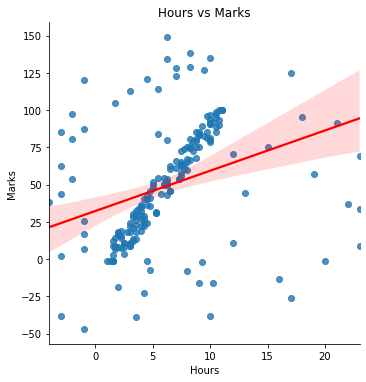

In [106]:
plot_df(df4)

In [107]:
df4[df4['marks'] < 0].apply(lambda x: round_quarter(average(x.hours, df4, 'hours', 3)['marks'].mean()), axis=1)

3      28.75
10     11.50
23     29.00
42     43.50
43     80.00
55     83.75
56      8.25
58      3.50
72     46.25
96     17.00
102    20.00
113    66.00
123    31.25
128    11.50
141    65.00
145     3.50
168     3.50
175    35.00
176    52.00
186    76.50
dtype: float64

In [109]:
df4.loc[df4['marks'] < 0, 'marks'] = df4[df4['marks'] < 0].apply(lambda x: round_quarter(average(x.hours, df4, 'hours', 3)['marks'].mean()), axis=1)

In [110]:
# (df4['marks'] < 0).sum()

0

In [112]:
df4.loc[df4['marks'] > 100, 'marks'] = df4[df4['marks'] > 100].apply(lambda x: round_quarter(average(x.hours, df4, 'hours', 3)['marks'].mean()), axis=1)

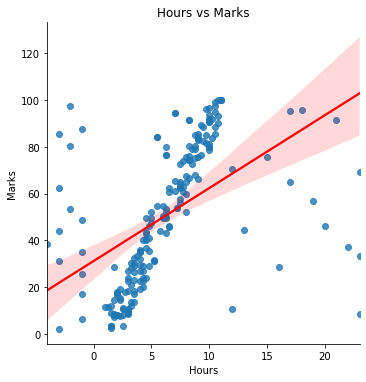

In [113]:
plot_df(df4)

In [118]:
df4.loc[df4['hours'] > 11, 'hours'] = df4[df4['hours'] > 11].apply(lambda x: round_quarter(average(x.marks, df4, 'marks', 9)['hours'].mean()), axis=1)

In [121]:
df4.loc[df4['hours'] < 1, 'hours'] = df4[df4['hours'] < 1].apply(lambda x: round_quarter(average(x.marks, df4, 'marks', 3)['hours'].mean()), axis=1)

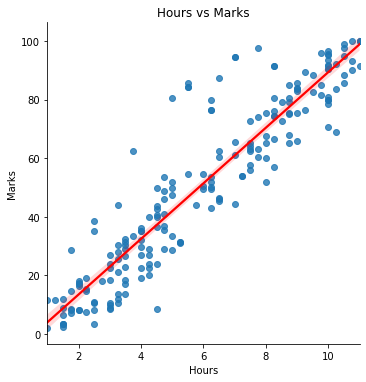

In [122]:
plot_df(df4)